# Figure - multiGPU

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
work_dir = "H:/workspace/ptyrad_paper"
os.chdir(work_dir)
print("Current working dir: ", os.getcwd())

Current working dir:  H:\workspace\ptyrad_paper


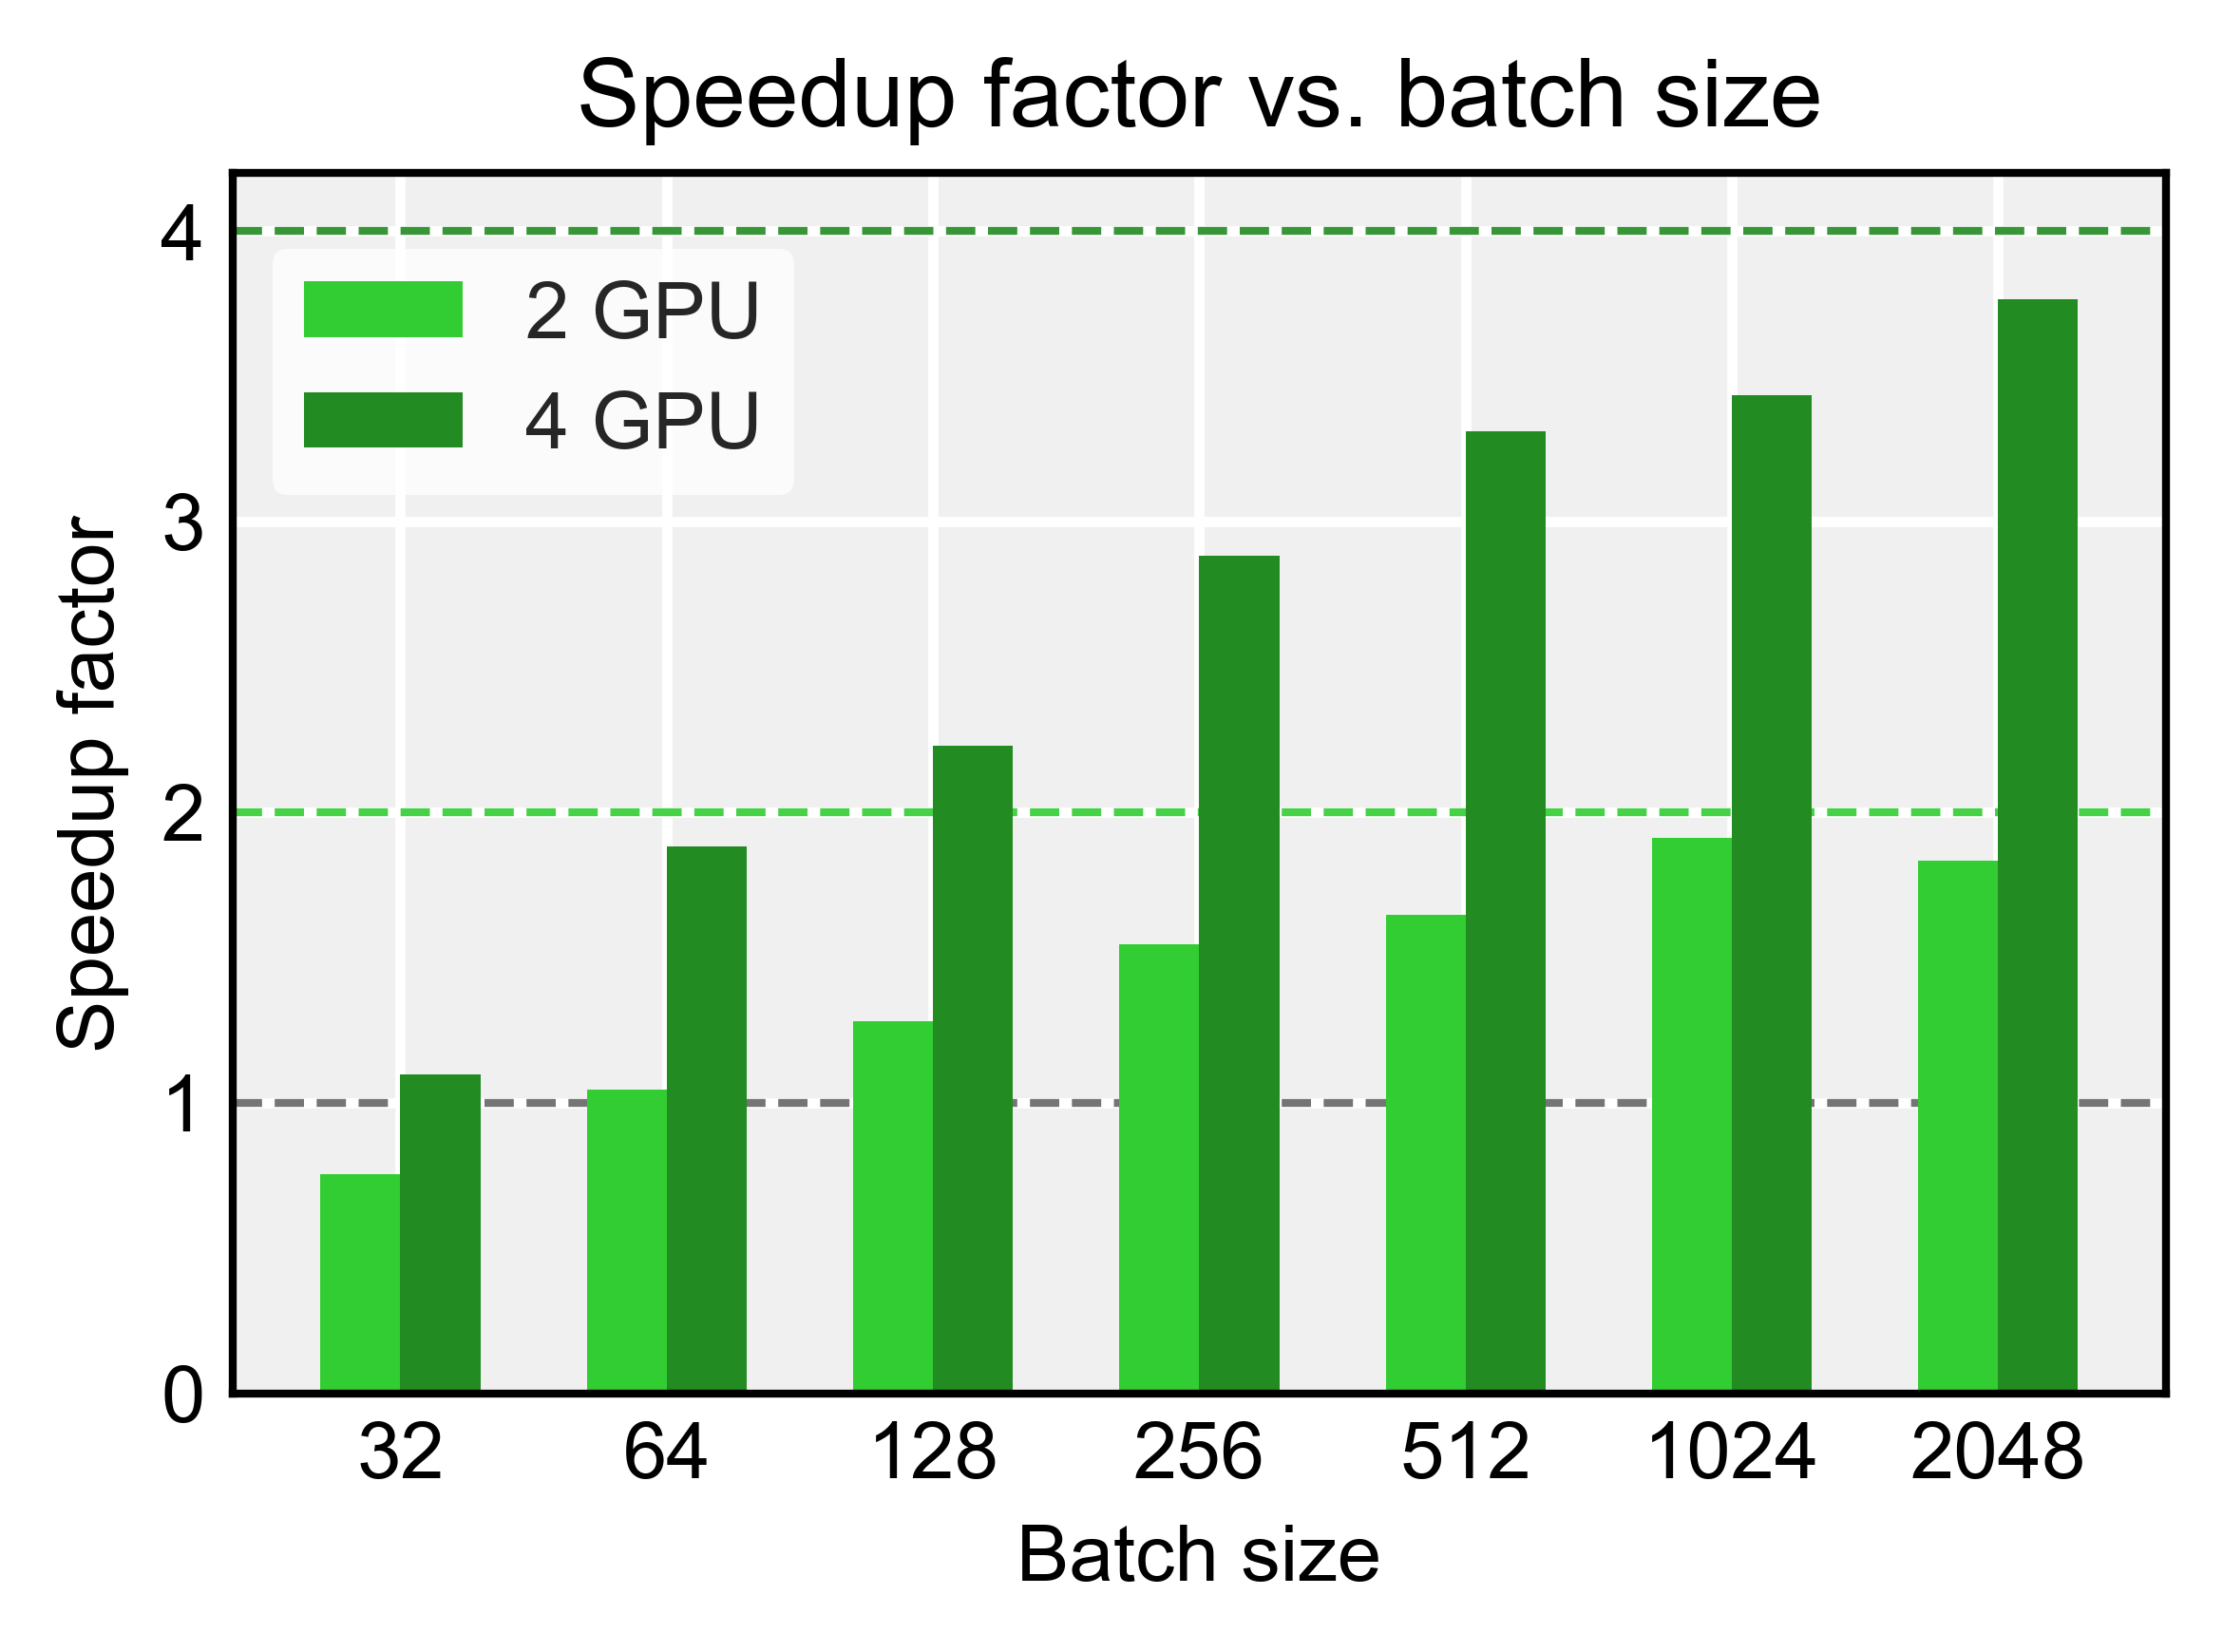

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# The multiGPU tests are all done on A100 (80GB) due to hardware availability at the time, honestly we can't really saturate our A100 so doing multiGPU on it isn't very ideal
# If time permits, rent a Linux machine with a couple GPUs and NVLink using vastai would be the most ideal/relevant test case
# See docs/20241215_multiGPU/ for raw data and more details

# Data
batch_sizes = [32, 64, 128, 256, 512, 1024, 2048]
speedup_2GPU = [0.7535, 1.0456, 1.2811, 1.5455, 1.6476, 1.9112, 1.8322]
speedup_4GPU = [1.0977, 1.8829, 2.2268, 2.8810, 3.3117, 3.4335, 3.7647]

# Bar width
bar_width = 0.3  
x = np.arange(len(batch_sizes))

# Set the style to be more like plotly
plt.style.use('seaborn-v0_8-whitegrid')

# Create figure
fig, ax = plt.subplots(figsize=(4, 3), dpi=600)

# Set background colors
ax.set_facecolor('#F0F0F0')  # Light gray for plot area
fig.patch.set_facecolor('white')  # White for margins

# Customize grid
ax.grid(True, color='white', linestyle='-', linewidth=1.3, zorder=0)
ax.set_axisbelow(True)

# Dashed horizontal reference lines
ax.axhline(y=1, color="#666666", linestyle="dashed", linewidth=1, alpha=0.9)    # 1x speedup
ax.axhline(y=2, color="limegreen", linestyle="dashed", linewidth=1, alpha=0.9)  # 2x speedup
ax.axhline(y=4, color="forestgreen", linestyle="dashed", linewidth=1, alpha=0.9)   # 4x ideal speedup

# Plot bars
ax.bar(x - bar_width/2, speedup_2GPU, bar_width, label="2 GPU", color="limegreen", zorder=2)
ax.bar(x + bar_width/2, speedup_4GPU, bar_width, label="4 GPU", color="forestgreen", zorder=2)

# Customize spines

ax.spines['top'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')

# Labels & Titles
ax.set_xticks(x)
ax.set_xticklabels(batch_sizes)
ax.set_xlabel("Batch size", color='k')
ax.set_ylabel("Speedup factor", color='k')
ax.set_title("Speedup factor vs. batch size", color='k')

# Customize ticks
ax.tick_params(colors='k')

# Legend
ax.legend(frameon=True, 
         facecolor='white', 
         edgecolor='none',
         bbox_to_anchor=(0.0, 0.97),  # x=1.0 means right aligned, y=0.98 positions it near the top
         loc='upper left')

# Adjust layout
plt.tight_layout()

plt.savefig("05_figures/Fig_S02_multiGPU_speedup.pdf", bbox_inches="tight")
plt.savefig("05_figures/Fig_S02_multiGPU_speedup.png", bbox_inches="tight")


# Show the plot
plt.show()